In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings

## Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

```
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
```

In [29]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
df = pd.DataFrame(data, columns=['weather', 'stroll'])
df

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [30]:
p_rain =  len(df.loc[df['weather'] == 'дождь']) / len(df)
p_stroll = len(df.loc[df['stroll'] == True]) / len(df)
p_rain_if_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['stroll'] == True])
p_stroll_if_rain = (p_stroll*p_rain_if_stroll)/p_rain
print(f"Вероятность отправиться на прогулку если идёт дождь: {p_stroll_if_rain}")

Вероятность отправиться на прогулку если идёт дождь: 0.3333333333333333


## Задание 2

- загрузите датасет для классификации, проведите предобработку, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- Масштабируйте числовые признаки
- В случае дисбаланса проведите балансировку
- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


In [31]:
data= pd.read_csv("../data/csgo_task.csv")
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,2.0,4.0
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,5.0,5.0
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0


In [32]:
data.isnull().any().sum()

7

In [33]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.dtypes

time_left           float64
ct_score            float64
t_score             float64
map                  object
bomb_planted           bool
ct_health           float64
t_health            float64
ct_armor            float64
t_armor             float64
ct_money            float64
t_money             float64
ct_helmets          float64
t_helmets           float64
ct_defuse_kits      float64
ct_players_alive    float64
t_players_alive     float64
dtype: object

In [34]:
data['bomb_planted'] = (~data['bomb_planted']).astype(np.byte)
d = data.groupby(['map', 'bomb_planted'])['bomb_planted'].count()
d

map          bomb_planted
de_cache     0                  10
             1                 128
de_dust2     0                2593
             1               17766
de_inferno   0                2984
             1               19062
de_mirage    0                2003
             1               15016
de_nuke      0                1780
             1               15436
de_overpass  0                1305
             1               11638
de_train     0                1360
             1               11003
de_vertigo   0                1172
             1                9215
Name: bomb_planted, dtype: int64

In [35]:
data_new = pd.get_dummies(data, columns=['map'])
data_new

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,1,500.0,500.0,0.0,0.0,4000.0,4000.0,...,5.0,5.0,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,1,500.0,500.0,400.0,300.0,600.0,650.0,...,5.0,5.0,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,1,391.0,400.0,294.0,200.0,750.0,500.0,...,4.0,4.0,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,1,391.0,400.0,294.0,200.0,750.0,500.0,...,4.0,4.0,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,1,500.0,500.0,192.0,0.0,18350.0,10750.0,...,5.0,5.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,0,200.0,242.0,195.0,359.0,100.0,5950.0,...,2.0,4.0,0,0,0,0,0,0,1,0
122406,174.93,11.0,15.0,1,500.0,500.0,95.0,175.0,11500.0,23900.0,...,5.0,5.0,0,0,0,0,0,0,1,0
122407,114.93,11.0,15.0,1,500.0,500.0,495.0,475.0,1200.0,6700.0,...,5.0,5.0,0,0,0,0,0,0,1,0
122408,94.93,11.0,15.0,1,500.0,500.0,495.0,475.0,1200.0,6700.0,...,5.0,5.0,0,0,0,0,0,0,1,0


In [36]:
data = data_new.drop(['ct_helmets', 't_helmets', 'ct_defuse_kits', 'bomb_planted', 'ct_armor', 't_armor'], axis=1)
X = data.values
X[:5]

array([[1.7500e+02, 0.0000e+00, 0.0000e+00, 5.0000e+02, 5.0000e+02,
        4.0000e+03, 4.0000e+03, 5.0000e+00, 5.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [1.5603e+02, 0.0000e+00, 0.0000e+00, 5.0000e+02, 5.0000e+02,
        6.0000e+02, 6.5000e+02, 5.0000e+00, 5.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [9.6030e+01, 0.0000e+00, 0.0000e+00, 3.9100e+02, 4.0000e+02,
        7.5000e+02, 5.0000e+02, 4.0000e+00, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [7.6030e+01, 0.0000e+00, 0.0000e+00, 3.9100e+02, 4.0000e+02,
        7.5000e+02, 5.0000e+02, 4.0000e+00, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00],
       [1.7497e+02, 1.0000e+00, 0.0000e+00, 5.0000e+

In [37]:
y = data_new['bomb_planted'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int8)

In [38]:
print(f"Количество объектов классов: 0 и 1 до андерсемплинга {Counter(y)}")


Количество объектов классов: 0 и 1 до андерсемплинга Counter({1: 99264, 0: 13207})


In [39]:
underSampler = RandomUnderSampler(random_state=42)
X_under_sample, y_under_sample = underSampler.fit_resample(X,y)
print(f"Количество объектов классов: 0 и 1 после андерсемплинга {Counter(y_under_sample)}")

Количество объектов классов: 0 и 1 после андерсемплинга Counter({0: 13207, 1: 13207})


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_under_sample, y_under_sample, test_size=0.2, random_state=4)

In [41]:
data.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_money,t_money,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
count,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000,112471.000000
mean,94.053707,6.779232,6.836820,407.871336,397.851153,10022.127926,11522.460012,4.238915,4.229215,0.001227,0.181016,0.196015,0.151319,0.153071,0.115079,0.109922,0.092353
std,52.984146,4.802931,4.832594,134.024392,141.702350,11275.465347,12224.426788,1.223794,1.248301,0.035007,0.385033,0.396982,0.358361,0.360057,0.319118,0.312793,0.289524
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.900000,3.000000,3.000000,332.000000,306.000000,1300.000000,1650.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.870000,6.000000,6.000000,500.000000,499.000000,6000.000000,7750.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,114.960000,10.000000,11.000000,500.000000,500.000000,15100.000000,18400.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,80000.000000,80000.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_std = pd.DataFrame(standardScaler.transform(X_train), columns=data.columns)
X_test_std = pd.DataFrame(standardScaler.transform(X_test), columns=data.columns)
X_train_std.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_money,t_money,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
count,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04,2.113100e+04
mean,9.881221e-14,-1.055844e-16,9.583298e-17,-1.062569e-16,-5.867669e-17,8.070146e-18,-2.622797e-17,-5.581851e-17,-2.992679e-17,1.967098e-17,6.893250e-17,-1.277773e-17,9.213417e-17,-1.815783e-17,-8.112178e-17,5.783605e-17,2.219290e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.184094e+00,-1.385997e+00,-1.414406e+00,-1.857120e+00,-1.981663e+00,-7.673011e-01,-8.710393e-01,-1.500982e+00,-2.411619e+00,-3.300961e-02,-4.808274e-01,-5.106853e-01,-4.219807e-01,-4.094534e-01,-3.496544e-01,-3.451205e-01,-3.224365e-01
25%,-7.470871e-01,-7.624166e-01,-7.852905e-01,-8.771839e-01,-7.735244e-01,-6.795151e-01,-7.390459e-01,-8.585032e-01,-4.254453e-01,-3.300961e-02,-4.808274e-01,-5.106853e-01,-4.219807e-01,-4.094534e-01,-3.496544e-01,-3.451205e-01,-3.224365e-01
50%,-4.965193e-01,-1.388358e-01,-1.561749e-01,-5.956828e-02,1.157148e-01,-4.213209e-01,-3.840291e-01,-2.160244e-01,2.366126e-01,-3.300961e-02,-4.808274e-01,-5.106853e-01,-4.219807e-01,-4.094534e-01,-3.496544e-01,-3.451205e-01,-3.224365e-01
75%,5.806621e-01,6.926052e-01,6.826460e-01,1.142808e+00,1.084679e+00,3.222783e-01,4.215859e-01,1.068933e+00,8.986706e-01,-3.300961e-02,-4.808274e-01,-5.106853e-01,-4.219807e-01,-4.094534e-01,-3.496544e-01,-3.451205e-01,-3.224365e-01
max,2.068641e+00,5.265531e+00,5.505866e+00,1.142808e+00,1.084679e+00,7.494912e+00,6.411356e+00,1.068933e+00,8.986706e-01,3.029421e+01,2.079748e+00,1.958153e+00,2.369777e+00,2.442280e+00,2.859967e+00,2.897539e+00,3.101386e+00


In [43]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X_train)
X_train_mms = pd.DataFrame(minMaxScaler.transform(X_train), columns=data.columns)
X_test_mms = pd.DataFrame(minMaxScaler.transform(X_test), columns=data.columns)
X_train_mms.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_money,t_money,ct_players_alive,t_players_alive,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
count,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000,21131.000000
mean,0.364030,0.208373,0.204386,0.619055,0.646263,0.092869,0.119609,0.584059,0.728522,0.001088,0.187781,0.206852,0.151152,0.143581,0.108939,0.106431,0.094174
std,0.307441,0.150345,0.144506,0.333349,0.326129,0.121036,0.137321,0.389127,0.302096,0.032974,0.390546,0.405058,0.358206,0.350672,0.311571,0.308396,0.292078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134351,0.093750,0.090909,0.326653,0.394000,0.010625,0.018125,0.250000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.211384,0.187500,0.181818,0.599198,0.684000,0.041875,0.066875,0.500000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.542545,0.312500,0.303030,1.000000,1.000000,0.131875,0.177500,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
def plot_roc_curve(y_true, probs):
    probs = probs[:, 1]
    auc_ = roc_auc_score(y_true, probs)
    print(' ROC AUC=%.3f' % (auc_))
    fpr, tpr, treshold = roc_curve(y_true, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
            label='ROC кривая (AUC = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")
    plt.show()

In [45]:
def showMetrics(y_true, y_predict, y_proba):
    print(f"Accuracy: {accuracy_score(y_true, y_predict)}")
    print(f"Confusion matrix:\n {confusion_matrix(y_true, y_predict)}")
    print(f"Precision, Recall, F-score:\n{classification_report(y_true, y_predict)}")
    plot_roc_curve(y_true, y_proba)

Accuracy: 0.9197425705091804
Confusion matrix:
 [[2565  131]
 [ 293 2294]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2696
           1       0.95      0.89      0.92      2587

    accuracy                           0.92      5283
   macro avg       0.92      0.92      0.92      5283
weighted avg       0.92      0.92      0.92      5283

 ROC AUC=0.962


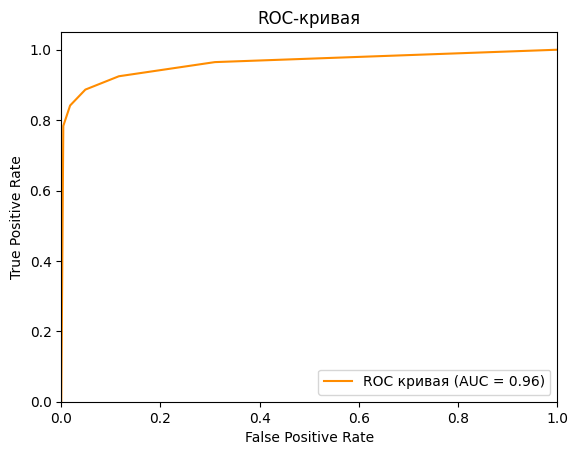

In [46]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 
knn.fit(X_train_mms, y_train)
y_knn_predict = knn.predict(X_test_mms)
knn_probs = knn.predict_proba(X_test_mms)
showMetrics(y_test, y_knn_predict,  knn_probs)


In [47]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_mms, y_train)
grid_search.best_params_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'n_neighbors': 5}

In [48]:
def GNB(X_train, y_train, X_test, y_test):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    gnb_pred = gnb.predict(X_test)
    gnb_probs = gnb.predict_proba(X_test)
    showMetrics(y_test, gnb_pred, gnb_probs)



Данные без масштабирования
Accuracy: 0.9093318190422108
Confusion matrix:
 [[2492  204]
 [ 275 2312]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2696
           1       0.92      0.89      0.91      2587

    accuracy                           0.91      5283
   macro avg       0.91      0.91      0.91      5283
weighted avg       0.91      0.91      0.91      5283

 ROC AUC=0.960


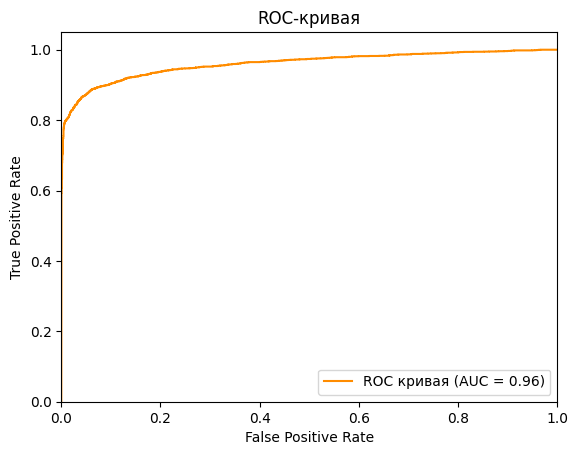

Данные с нормализацией
Accuracy: 0.910088964603445
Confusion matrix:
 [[2500  196]
 [ 279 2308]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2696
           1       0.92      0.89      0.91      2587

    accuracy                           0.91      5283
   macro avg       0.91      0.91      0.91      5283
weighted avg       0.91      0.91      0.91      5283

 ROC AUC=0.959


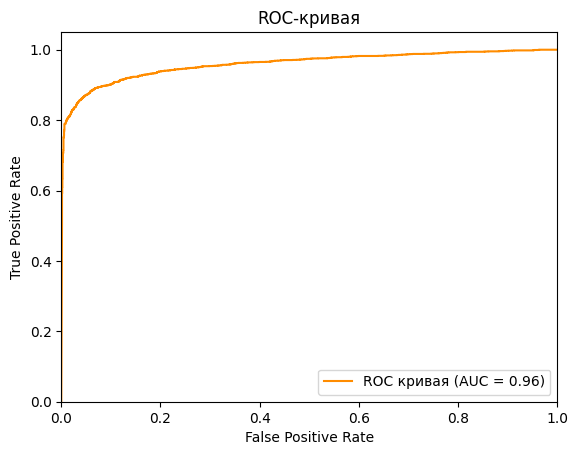

Данные с стандартизацией
Accuracy: 0.910088964603445
Confusion matrix:
 [[2500  196]
 [ 279 2308]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2696
           1       0.92      0.89      0.91      2587

    accuracy                           0.91      5283
   macro avg       0.91      0.91      0.91      5283
weighted avg       0.91      0.91      0.91      5283

 ROC AUC=0.959


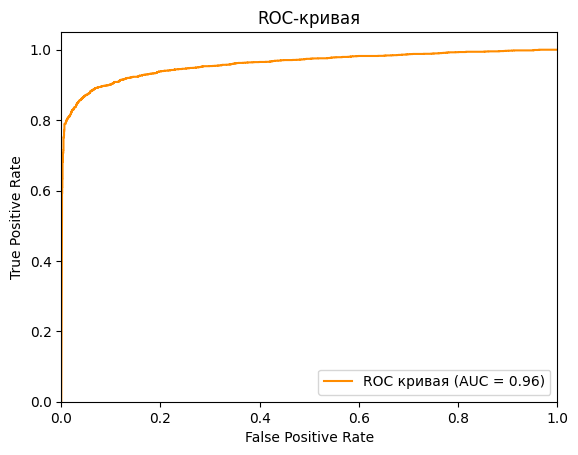

In [49]:
print("Данные без масштабирования")
GNB(X_train, y_train, X_test, y_test)
print("Данные с нормализацией")
GNB(X_train_mms, y_train, X_test_mms, y_test)
print("Данные с стандартизацией")
GNB(X_train_std, y_train, X_test_std, y_test)

In [50]:
def LogisticRegressionCall(X_train, y_train, X_test, y_test):
    warnings.filterwarnings('ignore')
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    pred = lg.predict(X_test)
    probs = lg.predict_proba(X_test)
    showMetrics(y_test, pred, probs)


Accuracy: 0.819799356426273
Confusion matrix:
 [[2052  644]
 [ 308 2279]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      2696
           1       0.78      0.88      0.83      2587

    accuracy                           0.82      5283
   macro avg       0.82      0.82      0.82      5283
weighted avg       0.83      0.82      0.82      5283

 ROC AUC=0.917


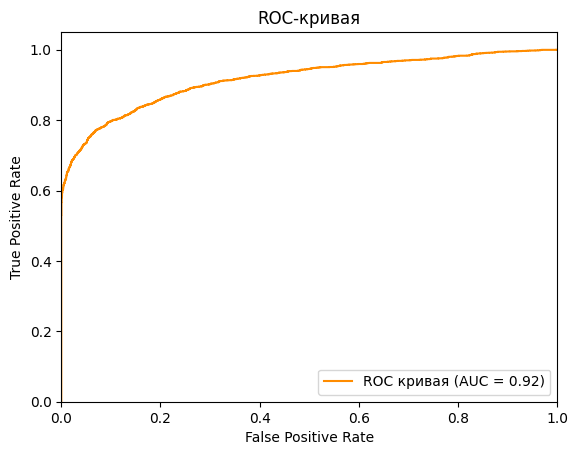

Accuracy: 0.9415105053946621
Confusion matrix:
 [[2609   87]
 [ 222 2365]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2696
           1       0.96      0.91      0.94      2587

    accuracy                           0.94      5283
   macro avg       0.94      0.94      0.94      5283
weighted avg       0.94      0.94      0.94      5283

 ROC AUC=0.975


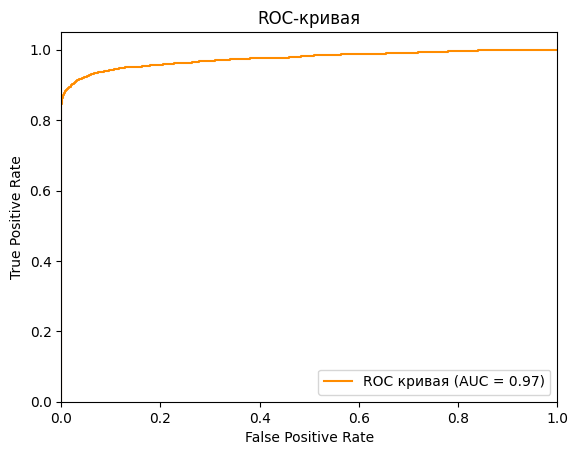

Accuracy: 0.9409426462237365
Confusion matrix:
 [[2603   93]
 [ 219 2368]]
Precision, Recall, F-score:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2696
           1       0.96      0.92      0.94      2587

    accuracy                           0.94      5283
   macro avg       0.94      0.94      0.94      5283
weighted avg       0.94      0.94      0.94      5283

 ROC AUC=0.975


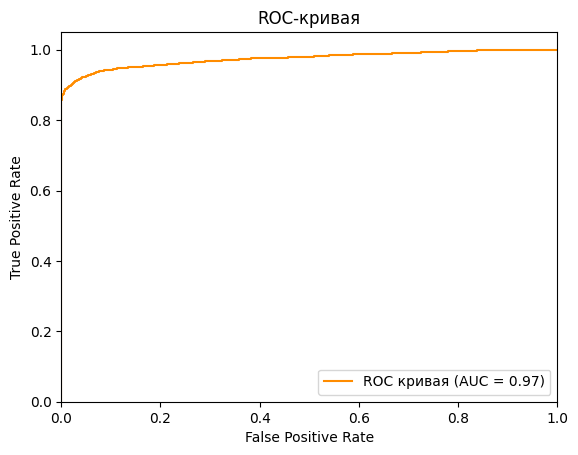

In [51]:
LogisticRegressionCall(X_train, y_train, X_test, y_test )
LogisticRegressionCall(X_train_mms, y_train, X_test_mms, y_test )
LogisticRegressionCall(X_train_std, y_train, X_test_std, y_test )